# Plots ZEV Case
* Generates Plots for th ZEV Worst case Scenario

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy_financial as npf
from datetime import timedelta

color_da_node = "#4477aa"
color_id_node = "#66ccee"
color_fcr_node = "#84CA90"
color_solar_node = "#ccbb44"
color_bess_node = "#ee7733"
color_sre_node = "#ee6677"
color_tre_node = "#aa3377"
color_else2 = "#bbbbbb"

eth_blue = "#215CAF"
eth_petrol = "#279CB6"
eth_lightgreen = "#6CBF84"
eth_green = "#627313"
eth_yellow = "#E6A91A"
eth_orange = "#ee7733"
eth_bronce = "#8E6713"
eth_red = "#B7352D"
eth_purple = "#A7117A"
eth_gray = "#6F6F6F"
eth_gray = "#C2C2C2"

# ------------------------ Load Excel ------------------------
# Set repo_root to the parent directory above Case_Plots_Sources
repo_root = Path().resolve().parent
output_folder = repo_root / "Report_Plottings" / "output"
#
#repo_root = Path(__file__).parent.parent

inflation_rate = 0.0175
case = 1  # 1: Stand Alone
scenario_name = 2 # 2: 1.2_FCR 3: 0.8_FCR
def input_parameter(case):
    if case == 1:
        bat_cost = 39000  # CHF
        bat_operation_maintenance = 1170 # CHF 3% of bat_cost
        ekz_energy_margin = 0  # [CHF/MWh]
        ekz_solar_contracting = 0  # [CHF/MWh]
        ekz_baas_contracting = 0 #[CHF/MWh]
        grid_connection_cost = 0  # CHF/year
        MVarh_cost = 0  # CHF/year
    elif case == 2:
        bat_cost = 22000  # CHF
        bat_operation_maintenance = 660 # CHF 3% of bat_cost
        ekz_energy_margin = 0  # [CHF/MWh]
        ekz_solar_contracting = 0  # [CHF/MWh]
        ekz_baas_contracting = 0 #[CHF/MWh]
        grid_connection_cost = 0  # CHF/year
        MVarh_cost = 0  # CHF/year
    else:
        return "No valid case selected"
    return bat_cost, bat_operation_maintenance

def input_files(case,scenario_name):
    if case == 1 and scenario_name == 1:
        return [
            repo_root / "Result Storage" / "ZEV_Worst_Case" / f"2026_(Worst_Case_Scenario)_ZEV_Waedenswil_100.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case" / f"2027_(Worst_Case_Scenario)_ZEV_Waedenswil_100.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case" / f"2028_(Worst_Case_Scenario)_ZEV_Waedenswil_100.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case" / f"2029_(Worst_Case_Scenario)_ZEV_Waedenswil_100.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case" / f"2030_(Worst_Case_Scenario)_ZEV_Waedenswil_100.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case" / f"2031_(Worst_Case_Scenario)_ZEV_Waedenswil_100.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case" / f"2032_(Worst_Case_Scenario)_ZEV_Waedenswil_100.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case" / f"2033_(Worst_Case_Scenario)_ZEV_Waedenswil_100.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case" / f"2034_(Worst_Case_Scenario)_ZEV_Waedenswil_100.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case" / f"2035_(Worst_Case_Scenario)_ZEV_Waedenswil_100.0kWh-Results.xlsx",
        ]
    elif case == 1 and scenario_name == 2:
        return [
            repo_root / "Result Storage" / "ZEV_Worst_Case_50kWh" / f"2026_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case_50kWh" / f"2027_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case_50kWh" / f"2028_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case_50kWh" / f"2029_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case_50kWh" / f"2030_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case_50kWh" / f"2031_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case_50kWh" / f"2032_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case_50kWh" / f"2033_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case_50kWh" / f"2034_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx",
            repo_root / "Result Storage" / "ZEV_Worst_Case_50kWh" / f"2035_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx",
         ]
    else:
        print("No valid case/scenario selected")
        return []

bat_cost, bat_operation_maintenance = input_parameter(scenario_name)
input_files = input_files(case,scenario_name)
print(input_files)

[WindowsPath('C:/Users/TJANWALL/OneDrive - Elektrizitätswerke des Kantons Zürich/Dokumente/02_VS CODE/Result Storage/ZEV_Worst_Case_50kWh/2026_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx'), WindowsPath('C:/Users/TJANWALL/OneDrive - Elektrizitätswerke des Kantons Zürich/Dokumente/02_VS CODE/Result Storage/ZEV_Worst_Case_50kWh/2027_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx'), WindowsPath('C:/Users/TJANWALL/OneDrive - Elektrizitätswerke des Kantons Zürich/Dokumente/02_VS CODE/Result Storage/ZEV_Worst_Case_50kWh/2028_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx'), WindowsPath('C:/Users/TJANWALL/OneDrive - Elektrizitätswerke des Kantons Zürich/Dokumente/02_VS CODE/Result Storage/ZEV_Worst_Case_50kWh/2029_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xlsx'), WindowsPath('C:/Users/TJANWALL/OneDrive - Elektrizitätswerke des Kantons Zürich/Dokumente/02_VS CODE/Result Storage/ZEV_Worst_Case_50kWh/2030_(Worst_Case_Scenario)_ZEV_Waedenswil_50kWh-Results.xl

In [8]:
# Extract and concatenate 'Summary Solar-Bess' sheets from all input files
df_stand_alone_sum_solar_bess = []
df_stand_alone_sum_solar = []
for idx, file in enumerate(input_files):
    df_1 = pd.read_excel(file, sheet_name='Summary Solar-Bess')
    df_2 = pd.read_excel(file, sheet_name='Summary Solar')
    # Check if the first row is a duplicate header (string type, matches columns)
    if idx == 0:
        df_stand_alone_sum_solar_bess.append(df_1)
        df_stand_alone_sum_solar.append(df_2)
    else:
        # If the first row is a header, drop it; otherwise, append all rows
        if (df_1.iloc[0].astype(str).tolist() == df_1.columns.astype(str).tolist()):
            df_stand_alone_sum_solar_bess.append(df_1.iloc[1:])
            df_stand_alone_sum_solar.append(df_2.iloc[1:])
        else:
            df_stand_alone_sum_solar_bess.append(df_1)
            df_stand_alone_sum_solar.append(df_2)
df_stand_alone_sum_solar_bess = pd.concat(df_stand_alone_sum_solar_bess, ignore_index=True)
df_stand_alone_sum_solar = pd.concat(df_stand_alone_sum_solar, ignore_index=True)

# Print the whole dataframe
#print(df_stand_alone_sum_solar_bess)
#print(df_stand_alone_sum_solar)
print("Number of cycles:", df_stand_alone_sum_solar_bess['Total Cycles'].sum())

Number of cycles: 6137.201137029207


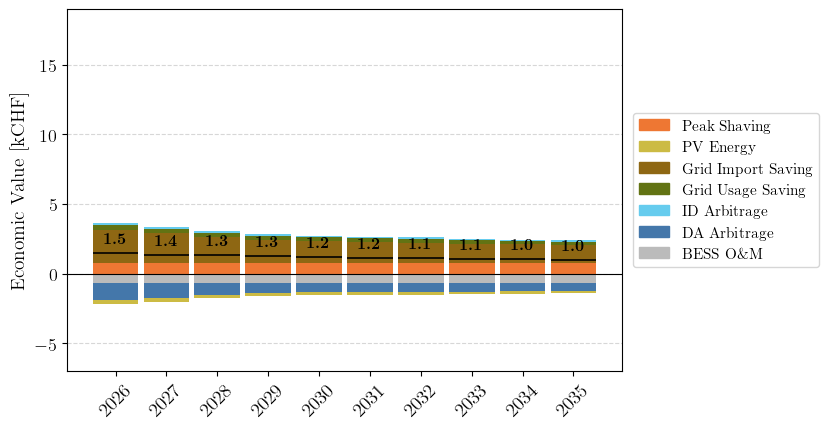

In [9]:
def revenue_lifetime(df_sum_solar_bess, df_sum_solar):

    # -----------------------------
    # --- LaTeX Formatting -------
    # -----------------------------
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 13
    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{amstext}'

    # --- Prepare data ---
    years = df_sum_solar['Year'] if 'Year' in df_sum_solar.columns else range(len(df_sum_solar))
    years = np.array(years)
    labels = years

    def extract_revenues(df, is_solar):

        r_bess_operation = df['Energy from Grid to Load (MWh)'] * 0 - bat_operation_maintenance
        r_fcr = df_sum_solar_bess['Revenue FCR (CHF)'].astype(float)
        r_da_arbitrage = df_sum_solar_bess['Revenue Arbitrage DA (CHF)'].astype(float)
        r_id_arbitrage = df_sum_solar_bess['Revenue Arbitrage ID (CHF)'].astype(float)
        r_sre = df_sum_solar_bess['Revenue SRE (CHF)'].astype(float)
        r_tre = df_sum_solar_bess['Revenue TRE (CHF)'].astype(float)
        r_pv_feedin = df_sum_solar_bess['Revenue Feed-in (CHF)'].astype(float) - df_sum_solar['Revenue Feed-in (CHF)'].astype(float)
        r_energy = df_sum_solar_bess['Cost Energy Demand (CHF)'].astype(float) - df_sum_solar['Cost Energy Demand (CHF)'].astype(float)
        r_peak_shaving = (df_sum_solar_bess['Cost Peak Demand (CHF)'].astype(float) - df_sum_solar['Cost Peak Demand (CHF)'].astype(float)) * 0.5
        r_grid_usage = df_sum_solar_bess['Cost Grid Usage (CHF)'].astype(float) - df_sum_solar['Cost Grid Usage (CHF)'].astype(float) 

        # Convert to thousands (kCHF)
        return tuple(x /1000 for x in [
            r_bess_operation,
            r_peak_shaving,
            r_energy,
            r_grid_usage,
            r_da_arbitrage,
            r_id_arbitrage,
            r_pv_feedin,
        ])

    # Extract (scaled) revenues
    r2 = extract_revenues(df_sum_solar_bess, False)
    
    value_costumer = (r2[2] + r2[3] + r2[1]) / df_stand_alone_sum_solar_bess['Energy from BESS to Load (MWh)'].astype(float)
    #print(f"Value to customer for energy supplied by BESS {value_costumer * 100} [Rp./kWh]")

    # --- Plot 1: Revenue comparison (stacked, kCHF) ---
    x = np.arange(len(years))
    width = 0.9  

    fig, ax = plt.subplots(figsize=(8.5, 4.5))

    colors = [
        "#bbbbbb", #BESS O&M
        "#ee7733", #Peak Shaving Cost
        "#8E6713", #Energy Cost
        "#627313", #Grid Usage Cost
        "#4477aa", #DA
        "#66ccee", #ID
        "#ccbb44", #PV Feed-in    
    ]

    colors_legend = [
        "#ee7733",  # Peak Shaving Cost (orange)
        "#ccbb44",  # PV Feed-in (yellow)
        "#8E6713",  # Energy Cost (gold/amber)
        "#627313",  # Grid Usage Cost (olive green)
        "#66ccee",  # ID (cyan)
        "#4477aa",  # DA (blue)
        "#bbbbbb",  # BESS O&M (grey / neutral)
    ]

    # Stacked bars
    bottom_pos = np.zeros(len(years))
    bottom_neg = np.zeros(len(years))

    for i, c in enumerate(r2):
        c = np.array(c)
        pos = np.where(c > 0, c, 0)
        neg = np.where(c < 0, c, 0)
        ax.bar(x, pos, width, bottom=bottom_pos, color=colors[i], alpha=1)
        ax.bar(x, neg, width, bottom=bottom_neg, color=colors[i], alpha=1)
        bottom_pos += pos
        bottom_neg += neg

    # Total revenue lines (still in kCHF)
    total_revenue = bottom_pos + bottom_neg

    for i in range(len(years)):
        ax.hlines(
            total_revenue[i],
            x[i] - width/2, x[i] + width/2,
            colors="black", linewidth=1.2
        )

        ax.text(
            x[i],
            total_revenue[i]+0.5,
            rf'\textbf{{{round(total_revenue[i],1)}}}',
            ha='center',
            va='bottom',
            fontsize=11.5
        )

    # Styling
    #ax.set_xlabel(r'\textbf{Year}', fontsize=11)
    ax.set_ylabel(r'Economic Value [kCHF]', fontsize=14)
    ax.set_ylim(-7, 19)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=14)

    ax.axhline(0, color='black', linewidth=0.8)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    ax.legend(
        handles=[plt.Rectangle((0, 0), 1, 1, color=c) for c in colors_legend],
        labels=[
            r'\text{Peak Shaving}',
            r'\text{PV Energy}',
            r'\text{Grid Import Saving}',
            r'\text{Grid Usage Saving}',
            r'\text{ID Arbitrage}',
            r'\text{DA Arbitrage}',
            r'\text{BESS O\&M}',
        ],
        loc='center left',               # anchor on left side of bbox
        bbox_to_anchor=(1.02, 0.5),      # push legend outside
        borderaxespad=0,                 # no extra gap
        fontsize=11
    )

    jpg_path = os.path.join(output_folder, "ZEV_Revenues_Worst.jpg")
    plt.savefig(jpg_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)

    plt.tight_layout()
    plt.show()

    return r2

values = revenue_lifetime(df_stand_alone_sum_solar_bess, df_stand_alone_sum_solar)
#print(values[1])

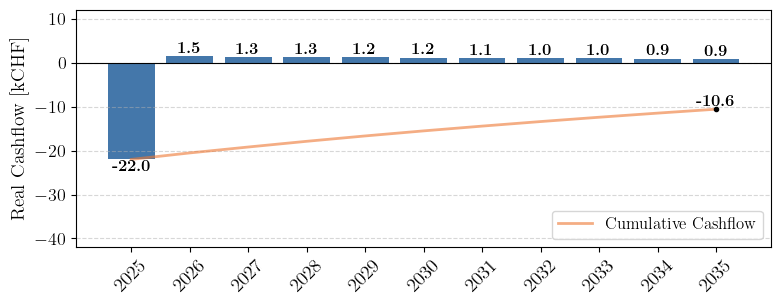

NPV Nominal: -9982.75 CHF
NPV Real (1.00%): -10576.32 CHF
IRR: -10.27 %


In [10]:
def cashflow_lifetime(df_sum_solar_bess, df_sum_solar, r2):   
    # -----------------------------
    # --- LaTeX Formatting -------
    # -----------------------------
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 13
    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{amstext}'

    # --- Prepare data ---
    years = df_sum_solar['Year'] if 'Year' in df_sum_solar.columns else range(len(df_sum_solar))
    years = np.array(years)
    labels = years
    inflation_rate = 0.01      # 1%

    cashflow_diff = np.sum(np.array(r2), axis=0)

    # kCHF conversion
    cashflow_nominal = np.array([-bat_cost / 1000] + list(cashflow_diff))

    # ---- Inflation adjustment (all years after 2025) ----
    cashflow_real = cashflow_nominal.copy()
    for t in range(1, len(cashflow_real)):
        cashflow_real[t] = cashflow_real[t] / ((1 + inflation_rate) ** t)

    # ---- Cumulative cashflow (real) ----
    cumsum_cf = np.cumsum(cashflow_real)

    labels_cf = ['2025'] + list(labels)
    x = np.arange(len(cashflow_real))

    fig, ax = plt.subplots(figsize=(8, 3.25))

    # ---- Cashflow bars (real, inflation-adjusted) ----
    bars = ax.bar(x, cashflow_real, color=color_da_node, alpha=1)

    for bar in bars:
        y = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            y,
            rf'\textbf{{{round(y, 1)}}}',
            ha='center',
            va='bottom' if y > 0 else 'top',
            fontsize=12
        )

    # ---- Cumulative line (break-even curve) ----
    ax.plot(
        x,
        cumsum_cf,
        color=color_bess_node,
        linewidth=2.0,
        marker="",
        markersize=5,
        alpha=0.6,
        label=r'\text{Cumulative Cashflow}'  # Label for legend
    )

    # Label cumulative points
    for i in range(10, len(cumsum_cf)):
        ax.text(
            x[i],
            cumsum_cf[i],
            rf'\textbf{{{round(cumsum_cf[i],1)}}}',
            ha='center',
            va='bottom',
            fontsize=12
        )

    # Plot last cumulative point with a marker
    ax.plot(
        x[-1], cumsum_cf[-1],
        marker="o", color="black", markersize=3
    )

    # ---- Add a legend for the "Cumulative NPV" line ----
    ax.legend(loc='lower right', fontsize=12)

    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(labels_cf, rotation=45, ha='center', fontsize=14)

    ax.set_ylabel(r'Real Cashflow [kCHF]', fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_ylim(-42, 12)
    jpg_path = os.path.join(output_folder, "Industrial_Cashflow_Worst.jpg")
    plt.savefig(jpg_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)

    plt.tight_layout()
    plt.show()
   

    # Print KPIs still in CHF
    print(f"NPV Nominal: {np.sum(cashflow_nominal)*1000:.2f} CHF")
    print(f"NPV Real ({inflation_rate*100:.2f}%): {npf.npv(inflation_rate, cashflow_nominal)*1000:.2f} CHF")
    irr = npf.irr(cashflow_nominal * 1000)
    print(f"IRR: {irr*100:.2f} %")

cashflow_lifetime(df_stand_alone_sum_solar_bess, df_stand_alone_sum_solar, values)

In [11]:
Feed_in_tariff = 232.4  # CHF/MWh
revenues_costumer = [values[0], values[1], values[2], values[3], values[4], values[5], values[6], -df_stand_alone_sum_solar_bess['Energy from BESS to Load (MWh)'].astype(float) * Feed_in_tariff /1000]
revenues_ekz = [values[0], values[1], values[2], values[3], values[4], values[5], values[6], +df_stand_alone_sum_solar_bess['Energy from BESS to Load (MWh)'].astype(float) * Feed_in_tariff /1000]

#rint(revenues_costumer)

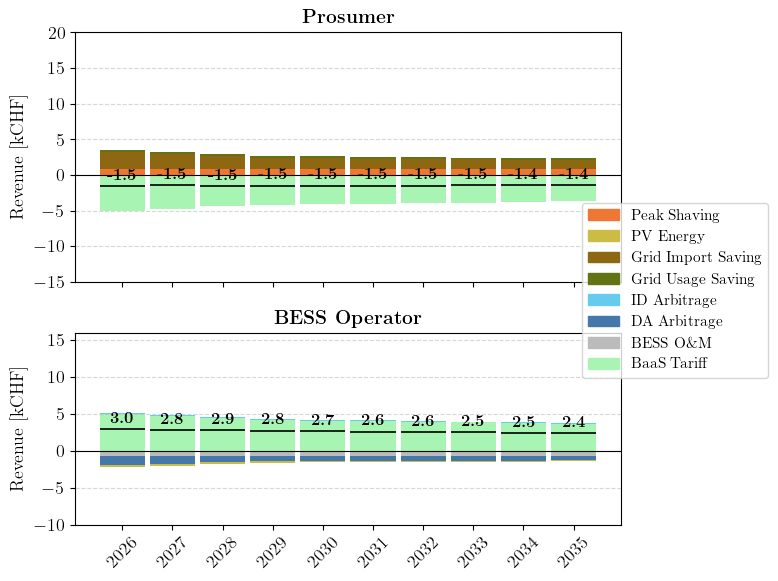

In [12]:
def plot_revenue_costumer(df_sum_solar_bess, df_sum_solar, revenue_costumer, revenues_ekz, output_folder):

    # -----------------------------
    # --- LaTeX Formatting -------
    # -----------------------------
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 13
    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['text.latex.preamble'] = (
        r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{amstext}'
    )

    # --- Prepare data ---
    years = df_sum_solar['Year'] if 'Year' in df_sum_solar.columns else range(len(df_sum_solar))
    years = np.array(years)
    x = np.arange(len(years))
    width = 0.9


    # -----------------------------------------
    # Extract CUSTOMER components
    # -----------------------------------------
    def extract_revenues_costumer(data):
        r_peak_shaving = np.array(data[1], dtype=float)
        r_energy       = np.array(data[2], dtype=float)
        r_grid_usage   = np.array(data[3], dtype=float)
        r_bess_feed_in = np.array(data[7], dtype=float)
        return (r_peak_shaving, r_energy, r_grid_usage, r_bess_feed_in)

    # -----------------------------------------
    # Extract EKZ components
    # -----------------------------------------
    def extract_revenues_ekz(data):
        r_bess_operation = np.array(data[0], dtype=float)
        r_da_arbitrage   = np.array(data[4], dtype=float)
        r_id_arbitrage   = np.array(data[5], dtype=float)
        r_pv_feedin      = np.array(data[6], dtype=float)
        r_bess_feedin    = np.array(data[7], dtype=float)
        return (r_bess_operation, r_bess_feedin, r_da_arbitrage, r_id_arbitrage, r_pv_feedin)

    r_customer = extract_revenues_costumer(revenue_costumer)
    r_ekz      = extract_revenues_ekz(revenues_ekz)

    # -----------------------------------------
    # Colors for each plot
    # -----------------------------------------
    colors_costumer = [
        "#ee7733",  # Peak shaving 
        "#8E6713",  # Energy value
        "#627313",  # Grid usage saving 
        "#A8F5B3",  # Feed-in loss (BaAS)
    ]

    colors_ekz = [
        "#bbbbbb", #BESS O&M
        "#A8F5B3", #BESS Feed-in loss
        "#4477aa", #DA
        "#66ccee", #ID
        "#ccbb44", #PV Feed-in 
    ]

    # EXACT legend colors requested by you:
    colors_legend = [
        "#ee7733",  # Peak Shaving 
        "#ccbb44",  # PV Energy
        "#8E6713",  # Energy Value
        "#627313",  # Grid Usage Saving
        "#66ccee",  # ID Arbitrage
        "#4477aa",  # DA Arbitrage
        "#bbbbbb",  # BESS O&M
        "#A8F5B3",  # BaaS 17Rp./kWh
    ]

    legend_labels = [
        r'\text{Peak Shaving}',
        r'\text{PV Energy}',
        r'\text{Grid Import Saving}',
        r'\text{Grid Usage Saving}',
        r'\text{ID Arbitrage}',
        r'\text{DA Arbitrage}',
        r'\text{BESS O\&M}',
        r'\text{BaaS Tariff}',
    ]

    # -----------------------------
    # --- Create two stacked plots
    # -----------------------------
    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(6.5, 6),
        sharex=True,
        gridspec_kw={'height_ratios': [1.3, 1]}
    )

    # -----------------------------
    # Stacked bar drawing function
    # -----------------------------
    def draw_stack(ax, revenues, colors):
        bottom_pos = np.zeros(len(years))
        bottom_neg = np.zeros(len(years))

        for comp, col in zip(revenues, colors):
            comp = np.array(comp)
            pos  = np.where(comp > 0, comp, 0)
            neg  = np.where(comp < 0, comp, 0)

            ax.bar(x, pos, width, bottom=bottom_pos, color=col)
            ax.bar(x, neg, width, bottom=bottom_neg, color=col)

            bottom_pos += pos
            bottom_neg += neg

        totals = bottom_pos + bottom_neg

        # Total line + text
        for i in range(len(years)):
            ax.hlines(xmin=x[i]-width/2, xmax=x[i]+width/2, y=totals[i],
                      colors="black", linewidth=1.2)
            ax.text(
                x[i], totals[i] + 0.4,
                rf'\textbf{{{round(totals[i],1)}}}',
                ha='center', va='bottom', fontsize=12
            )

        ax.axhline(0, color='black', linewidth=0.8)
        ax.grid(axis='y', linestyle='--', alpha=0.5)

        return totals

    # -----------------------------
    # --- Top plot (Customer) -----
    # -----------------------------
    ax1.set_title(r'\textbf{Prosumer}', fontsize=14)
    draw_stack(ax1, r_customer, colors_costumer)
    ax1.set_ylim(-13, 20.1)
    ax1.set_yticks(np.arange(-15, 25, 5))
    ax1.set_ylabel(r'\text{Revenue [kCHF]}')

    # -----------------------------
    # --- Bottom plot (EKZ) -------
    # -----------------------------
    ax2.set_title(r'\textbf{BESS Operator}', fontsize=14)
    draw_stack(ax2, r_ekz, colors_ekz)
    ax2.set_ylabel(r'\text{Revenue [kCHF]}')
    ax2.set_ylim(-9, 16)
    ax2.set_yticks(np.arange(-10, 20, 5))
    ax2.set_xticks(x)
    ax2.set_xticklabels(years, rotation=45, ha='center', fontsize=13)

    # -----------------------------
    # --- Shared Legend -----------
    # -----------------------------
    fig.legend(
        handles=[plt.Rectangle((0, 0), 1, 1, color=c) for c in colors_legend],
        labels=legend_labels,
        loc='center left',
        bbox_to_anchor=(0.91, 0.5),
        fontsize=11,
        borderaxespad=0
    )

    # -----------------------------
    # --- Save Figure -------------
    # -----------------------------
    os.makedirs(output_folder, exist_ok=True)
    jpg_path = os.path.join(output_folder, "ZEV_Revenue_Split_Worst.jpg")
    plt.savefig(jpg_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)

    plt.tight_layout()
    plt.show()

plot_revenue_costumer(df_stand_alone_sum_solar_bess, df_stand_alone_sum_solar, revenues_costumer, revenues_ekz, output_folder)  

In [13]:
def calculate_customer_npv(values, BaaS_tariff, inflation_rate=0.01, initial_cost_kCHF=0):
    """
    revenues_costumer : list of 4 arrays in kCHF
    inflation_rate    : yearly inflation (0.01 = 1%)
    initial_cost_kCHF : negative value if investment cost exists; otherwise 0
    """
    revenues_costumer = [values[0], values[1], values[2], values[3], values[4], values[5], values[6], -df_stand_alone_sum_solar_bess['Energy from BESS to Load (MWh)'].astype(float) * BaaS_tariff /1000]

# Unpack components (each is a yearly kCHF vector)
    r_peak_shaving = np.array(revenues_costumer[1], dtype=float)
    r_energy       = np.array(revenues_costumer[2], dtype=float)
    r_grid_usage   = np.array(revenues_costumer[3], dtype=float)
    r_bess_feed_in = np.array(revenues_costumer[7], dtype=float)

    # --- Total cashflow (kCHF) for each operating year ---
    cashflow_yearly = r_peak_shaving + r_energy + r_grid_usage + r_bess_feed_in

    # --- Cashflow vector including initial cost ---
    cashflow_nominal = np.concatenate(([initial_cost_kCHF], cashflow_yearly))

    # --- Inflation adjustment (real cashflow) ---
    cashflow_real = cashflow_nominal.copy()
    for t in range(1, len(cashflow_real)):
        cashflow_real[t] /= (1 + inflation_rate) ** t

    # --- KPIs ---
    npv_nominal_chf = np.sum(cashflow_nominal) * 1000     # convert kCHF → CHF
    npv_real_chf    = npf.npv(inflation_rate, cashflow_nominal) * 1000
    irr_value       = npf.irr(cashflow_nominal * 1000)    # IRR uses CHF

    # --- Print results ---
    #print(f"NPV Nominal: {npv_nominal_chf:,.2f} CHF")
    #print(f"NPV Real ({inflation_rate*100:.2f}%): {npv_real_chf:,.2f} CHF")
    #print(f"IRR: {irr_value*100:.2f} %")

    return {
        "cashflow_nominal_kCHF": cashflow_nominal,
        "cashflow_real_kCHF"   : cashflow_real,
        "NPV_nominal_CHF"      : npv_nominal_chf,
        "NPV_real_CHF"         : npv_real_chf,
        "IRR"                  : irr_value
    }

BaaS_tariff = 181  # CHF/MWh
customer_kpis = calculate_customer_npv(values, BaaS_tariff, inflation_rate=0.01, initial_cost_kCHF=0)
print(f"Net-Present Value (Real): {customer_kpis['NPV_real_CHF']:.2f} CHF")

Net-Present Value (Real): -5192.55 CHF


In [14]:
def calculate_ekz_npv(values, BaaS_tariff, inflation_rate=0.01, initial_cost_kCHF=0):
    """
    revenues_costumer : list of 4 arrays in kCHF
    inflation_rate    : yearly inflation (0.01 = 1%)
    initial_cost_kCHF : negative value if investment cost exists; otherwise 0
    """
    revenues_ekz = [values[0], values[1], values[2], values[3], values[4], values[5], values[6], df_stand_alone_sum_solar_bess['Energy from BESS to Load (MWh)'].astype(float) * BaaS_tariff /1000]

    # Unpack components (each is a yearly kCHF vector)
    r_bess_operation = np.array(revenues_ekz[0], dtype=float)
    r_da_arbitrage   = np.array(revenues_ekz[4], dtype=float)
    r_id_arbitrage   = np.array(revenues_ekz[5], dtype=float)
    r_pv_feedin      = np.array(revenues_ekz[6], dtype=float)
    r_bess_feedin    = np.array(revenues_ekz[7], dtype=float)

    # --- Total cashflow (kCHF) for each operating year ---
    cashflow_yearly = r_bess_operation + r_da_arbitrage + r_id_arbitrage + r_pv_feedin + r_bess_feedin
    #print("EKZ yearly cashflow (kCHF):", cashflow_yearly)

    # --- Cashflow vector including initial cost ---
    cashflow_nominal = np.concatenate(([initial_cost_kCHF], cashflow_yearly))

    # --- Inflation adjustment (real cashflow) ---
    cashflow_real = cashflow_nominal.copy()
    for t in range(1, len(cashflow_real)):
        cashflow_real[t] /= (1 + inflation_rate) ** t

    # --- KPIs ---
    npv_nominal_chf = np.sum(cashflow_nominal) * 1000     # convert kCHF → CHF
    npv_real_chf    = npf.npv(inflation_rate, cashflow_nominal) * 1000
    irr_value       = npf.irr(cashflow_nominal * 1000)    # IRR uses CHF

    # --- Print results ---
    #print(f"NPV Nominal: {npv_nominal_chf:,.2f} CHF")
    #print(f"NPV Real ({inflation_rate*100:.2f}%): {npv_real_chf:,.2f} CHF")
    #print(f"IRR: {irr_value*100:.2f} %")

    return {
        "cashflow_nominal_kCHF": cashflow_nominal,
        "cashflow_real_kCHF"   : cashflow_real,
        "NPV_nominal_CHF"      : npv_nominal_chf,
        "NPV_real_CHF"         : npv_real_chf,
        "IRR"                  : irr_value
    }
customer_kpis = calculate_ekz_npv(values, BaaS_tariff, inflation_rate=0.01, initial_cost_kCHF=-bat_cost / 1000)
print(f"Net-Present Value (Real): {customer_kpis['NPV_real_CHF']:.2f} CHF")
print(f"IRR: {customer_kpis['IRR']*100:.2f} %")

Net-Present Value (Real): -5383.77 CHF
IRR: -4.05 %



Sweeping BaaS Tariffs...



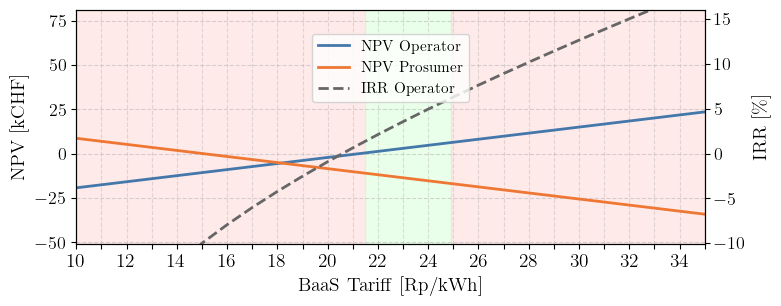

(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390]),
 array([-36.37319912, -34.66107588, -32.94895265, -31.23682941,
        -29.52470617, -27.81258293, -26.1004597 , -24.38833646,
        -22.67621322, -20.96408998, -19.25196675, -17.53984351,
        -15.82772027, -14.11559703, -12.4034738 , -10.69135056,
         -8.97922732,  -7.26710408,  -5.55498084,  -3.84285761,
         -2.13073437,  -0.41861113,   1.29351211,   3.00563534,
          4.71775858,   6.42988182,   8.14200506,   9.85412829,
         11.56625153,  13.27837477,  14.99049801,  16.70262124,
         18.41474448,  20.12686772,  21.83899096,  23.5511142 ,
         25.26323743,  26.97536067,  28.68748391,  30.39960715]),
 array([ 25.79688316,  24.08475992,  22.37263669,  20.66051345,
         18.94839021,  17.23626697,  15.52414374,  13.812020

In [15]:
def sweep_baas_tariff_and_plot(values, output_folder):

    # -----------------------------
    # --- LaTeX Formatting -------
    # -----------------------------
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 13
    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['text.latex.preamble'] = (
        r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{amstext}'
    )

    # Define sweep range (0 to 300 Rp/kWh)
    tariffs = np.arange(0, 391, 10)

    # Storage arrays
    ekz_npv_list = []
    ekz_irr_list = []
    customer_npv_list = []

    print("\nSweeping BaaS Tariffs...\n")

    for tariff in tariffs:

        # --- EKZ KPIs ---
        ekz_result = calculate_ekz_npv(
            values,
            BaaS_tariff=tariff,
            inflation_rate=0.01,
            initial_cost_kCHF=-bat_cost / 1000
        )

        ekz_npv_list.append(ekz_result["NPV_real_CHF"]/1000)
        ekz_irr_list.append(ekz_result["IRR"] * 100)  # convert to %

        # --- Customer KPIs ---
        cust_result = calculate_customer_npv(
            values,
            BaaS_tariff=tariff,
            inflation_rate=0.01,
            initial_cost_kCHF=0
        )

        customer_npv_list.append(cust_result["NPV_real_CHF"]/1000)

    # Convert lists to arrays
    ekz_npv_list = np.array(ekz_npv_list)
    ekz_irr_list = np.array(ekz_irr_list)
    customer_npv_list = np.array(customer_npv_list)

    # -----------------------------
    # --- Plot Results ------------
    # -----------------------------
    fig, ax1 = plt.subplots(figsize=(8, 3.25))

    # ---- EKZ NPV (CHF) ----
    ax1.plot(
        tariffs, ekz_npv_list,
        linewidth=2,
        color="#4477aa",
        label=r'\text{NPV Operator}'
    )

    # ---- Customer NPV (CHF) ----
    ax1.plot(
        tariffs, customer_npv_list,
        linewidth=2,
        color="#ee7733",
        label=r'\text{NPV Prosumer}'
    )

    ax1.set_ylabel(r'\text{NPV [kCHF]}', fontsize=14)
    ax1.grid(axis='y', linestyle='--', alpha=0.5)
    ax1.grid(axis='x', linestyle='--', alpha=0.4)

    # ---- EKZ IRR (%) ----
    ax2 = ax1.twinx()
    ax2.plot(
        tariffs, ekz_irr_list,
        linewidth=2.0,
        color="#666666",
        linestyle="--",
        label=r'\text{IRR Operator}'
    )
    ax2.set_ylabel(r'\text{IRR [\%]}', fontsize=14)

    # ---- Axis Formatting ----
    ax1.set_xlabel(r'\text{BaaS Tariff [Rp/kWh]}', fontsize=14)
    ax1.set_xticks(tariffs)
    ax1.set_xticklabels(
        [str(int(t/10)) if i % 2 == 0 else "" for i, t in enumerate(tariffs)],
        rotation=0,
        fontsize=14
    )

    ax1.set_ylim(-51,81)
    ax2.set_ylim(-10.1,16)
    ax1.set_xlim(100,350)
    # ---- Title ----
    #plt.title(r'\textbf{NPV and IRR as a Function of BaaS Tariff}', fontsize=16)

    # ---- Combined Legend ----
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()

    fig.legend(
        lines_1 + lines_2,
        labels_1 + labels_2,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.89), 
        fontsize=11,
        frameon=True
    )

        # Light red background on the left side 
    ax1.axvspan(0, 215, color="#ffcccc", alpha=0.4)
    ax1.axvspan(215, 249, color="#ccffcc", alpha=0.4)
    ax1.axvspan(249, 350, color="#ffcccc", alpha=0.4)

    # ---- Save Output ----
    os.makedirs(output_folder, exist_ok=True)
    plot_path = os.path.join(output_folder, "ZEV_NPV_IRR_vs_BaaS_Tariff_Worst.jpg")
    plt.savefig(plot_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)

    plt.tight_layout()
    plt.show()

    return tariffs, ekz_npv_list, customer_npv_list, ekz_irr_list

sweep_baas_tariff_and_plot(values, output_folder)

Average SDL revenues over 10 years: 4.14 kCHF


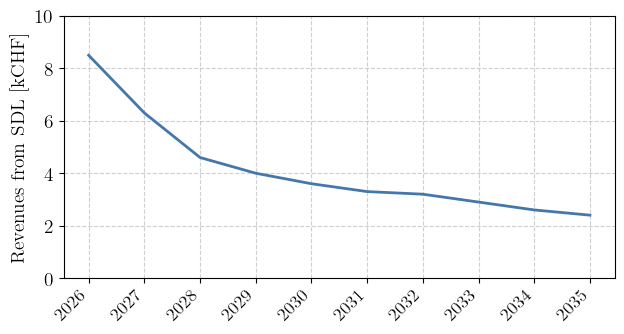

In [16]:
def plot_sdl_benefit():
    # Enable LaTeX-style text
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 14

    years = [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035]
    sdl_revenues = [8.5, 6.3, 4.6, 4.0, 3.6, 3.3, 3.2, 2.9, 2.6, 2.4]

    avg_sdl_revenues = sum(sdl_revenues) / 10
    print(f"Average SDL revenues over 10 years: {avg_sdl_revenues:.2f} kCHF")

    plt.figure(figsize=(7.5, 3.5))

    plt.plot(
        years, sdl_revenues,
        label=r'{Consumption}',
        color=color_da_node,
        linewidth=2
    )

    plt.ylabel(r'{Revenues from SDL [kCHF]}', fontsize=14)

    # ---- FIXED: rotate x-labels 45° and show all ----
    plt.xticks(years, rotation=45, ha='right', fontsize=13)

    # Grid
    plt.grid(True, which='both', linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.ylim(0, 10)

    jpg_path = os.path.join(output_folder, "ZEV_SDL_Benefit.jpg")
    plt.savefig(jpg_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)
    plt.show()

plot_sdl_benefit()